In [14]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

path = r".\\DataSet\\"

In [15]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,11.820078,83.089996,16.990000,16.889999,10.4,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,11.820078,94.820000,17.469999,19.040001,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,11.820078,75.919998,13.470000,20.270000,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,11.820078,61.029999,23.110001,10.850000,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.7,0.3,11.820078,105.199997,12.120000,37.160000,21.9,10.92,1.53,6.67,28079006


In [16]:
#cerco i campi NaN in PM10 e li sostituisco con la media dei valori noti
#trovo il valor medio
for col in allMadrid.columns:
    if allMadrid[col].dtype != object:
        allMadrid[col]=allMadrid[col].fillna(allMadrid[col].mean())

print(allMadrid['PM10'])

0          16.889999
1          19.040001
2          20.270000
3          10.850000
4          37.160000
             ...    
2190883    35.000000
2190884    29.000000
2190885    22.165019
2190886    22.165019
2190887    26.000000
Name: PM10, Length: 2190888, dtype: float64


In [17]:
# Faccio un cambio di formato sul campo data passando da stringa a data
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d %H:%M:%S')
#prendo la data solo in formato AAAA-MM-GG
#allMadrid['date'] = pd.to_datetime(allMadrid['date'].dt.strftime('%Y-%m-%d'))
print(allMadrid['date'])


0         2008-06-01 01:00:00
1         2008-06-01 01:00:00
2         2008-06-01 01:00:00
3         2008-06-01 01:00:00
4         2008-06-01 01:00:00
                  ...        
2190883   2018-02-01 00:00:00
2190884   2018-02-01 00:00:00
2190885   2018-02-01 00:00:00
2190886   2018-02-01 00:00:00
2190887   2018-02-01 00:00:00
Name: date, Length: 2190888, dtype: datetime64[ns]


In [5]:
#raggruppo per station
allMadrid = allMadrid.groupby(['station','date']).mean()
print(allMadrid)

                                   BEN    CO       EBE      NMHC         NO  \
station  date                                                                 
28079001 2008-01-01 01:00:00  0.744943  1.85  0.817488  0.195187  11.820078   
         2008-01-01 02:00:00  0.744943  2.39  0.817488  0.195187  11.820078   
         2008-01-01 03:00:00  0.744943  1.30  0.817488  0.195187  11.820078   
         2008-01-01 04:00:00  0.744943  1.00  0.817488  0.195187  11.820078   
         2008-01-01 05:00:00  0.744943  1.11  0.817488  0.195187  11.820078   
...                                ...   ...       ...       ...        ...   
28079099 2010-12-31 20:00:00  1.140000  0.61  0.850000  0.210000  11.820078   
         2010-12-31 21:00:00  1.330000  0.81  0.920000  0.240000  11.820078   
         2010-12-31 22:00:00  2.070000  0.70  1.300000  0.260000  11.820078   
         2010-12-31 23:00:00  1.490000  0.62  1.140000  0.260000  11.820078   
         2011-01-01 00:00:00  1.110000  0.48  0.8600

CLASSIFICAZIONE

In [18]:
condition_list = [(allMadrid['PM10'] <= 50), (allMadrid['PM10'] > 50)]

choicelist = [0,1] 

allMadrid['Livello'] = np.select(condition_list, choicelist, default='Non Specificato')

allMadrid['Livello'].value_counts() 

0    2097715
1      93173
Name: Livello, dtype: int64

In [19]:
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station,Livello
0,2008-06-01 01:00:00,0.744943,0.47,0.817488,0.195187,11.820078,83.089996,16.990000,16.889999,10.400000,8.98,1.429709,3.211411,28079001,0
1,2008-06-01 01:00:00,0.744943,0.59,0.817488,0.195187,11.820078,94.820000,17.469999,19.040001,11.526599,5.85,1.429709,3.211411,28079003,0
2,2008-06-01 01:00:00,0.744943,0.55,0.817488,0.195187,11.820078,75.919998,13.470000,20.270000,11.526599,6.95,1.429709,3.211411,28079004,0
3,2008-06-01 01:00:00,0.744943,0.36,0.817488,0.195187,11.820078,61.029999,23.110001,10.850000,11.526599,5.96,1.429709,3.211411,28079039,0
4,2008-06-01 01:00:00,1.680000,0.80,1.700000,0.300000,11.820078,105.199997,12.120000,37.160000,21.900000,10.92,1.530000,6.670000,28079006,0


BILANCIAMENTO DEL DATASET

In [20]:
#separazione da tollerabile a non_tollerabile
Livello = allMadrid['Livello']
allMadrid['Livello'] = pd.Series(Livello)
non_tollerabile = allMadrid[allMadrid.Livello == '1']
tollerabile = allMadrid[allMadrid.Livello == '0']

print("Tollerabili: ", len(tollerabile), "Non tollerabili: ", len(non_tollerabile))

Tollerabili:  2097715 Non tollerabili:  93173


In [21]:
#bilanciamento del dataset
balanced_d = pd.concat([non_tollerabile, tollerabile.sample(len(non_tollerabile))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(186346, 15)

In [22]:
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station,Livello
0,2008-06-01 01:00:00,0.744943,0.47,0.817488,0.195187,11.820078,83.089996,16.990000,16.889999,10.400000,8.98,1.429709,3.211411,28079001,0
1,2008-06-01 01:00:00,0.744943,0.59,0.817488,0.195187,11.820078,94.820000,17.469999,19.040001,11.526599,5.85,1.429709,3.211411,28079003,0
2,2008-06-01 01:00:00,0.744943,0.55,0.817488,0.195187,11.820078,75.919998,13.470000,20.270000,11.526599,6.95,1.429709,3.211411,28079004,0
3,2008-06-01 01:00:00,0.744943,0.36,0.817488,0.195187,11.820078,61.029999,23.110001,10.850000,11.526599,5.96,1.429709,3.211411,28079039,0
4,2008-06-01 01:00:00,1.680000,0.80,1.700000,0.300000,11.820078,105.199997,12.120000,37.160000,21.900000,10.92,1.530000,6.670000,28079006,0


ANALISI DELLE CORRELAZIONI

<Figure size 2160x1080 with 0 Axes>

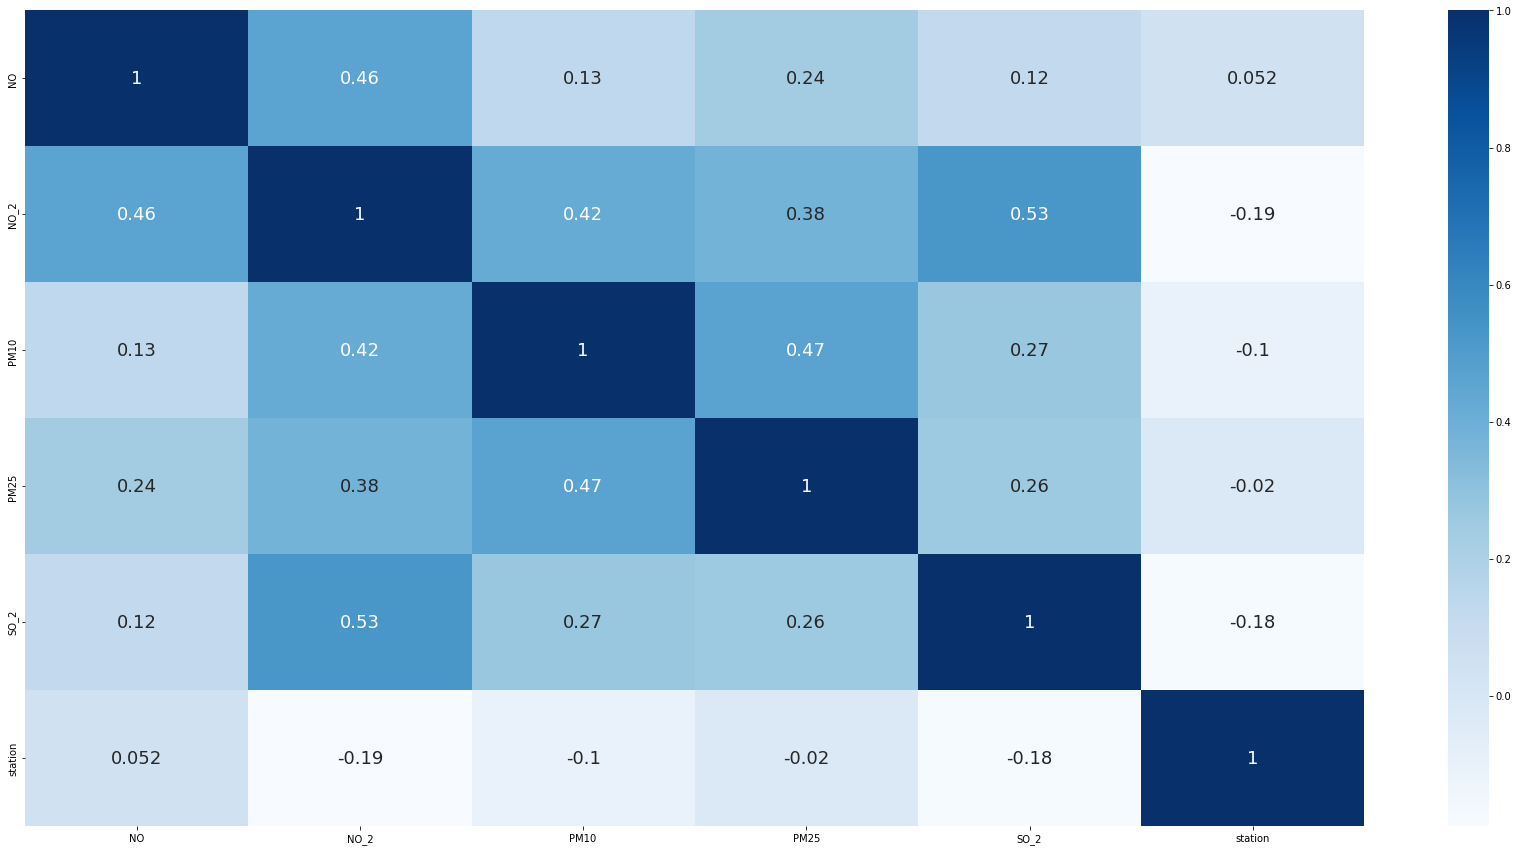

In [23]:
plt.figure(figsize=(30,15))

x = x.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL'], axis=1)

plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [24]:
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station,Livello
0,2008-06-01 01:00:00,0.744943,0.47,0.817488,0.195187,11.820078,83.089996,16.990000,16.889999,10.400000,8.98,1.429709,3.211411,28079001,0
1,2008-06-01 01:00:00,0.744943,0.59,0.817488,0.195187,11.820078,94.820000,17.469999,19.040001,11.526599,5.85,1.429709,3.211411,28079003,0
2,2008-06-01 01:00:00,0.744943,0.55,0.817488,0.195187,11.820078,75.919998,13.470000,20.270000,11.526599,6.95,1.429709,3.211411,28079004,0
3,2008-06-01 01:00:00,0.744943,0.36,0.817488,0.195187,11.820078,61.029999,23.110001,10.850000,11.526599,5.96,1.429709,3.211411,28079039,0
4,2008-06-01 01:00:00,1.680000,0.80,1.700000,0.300000,11.820078,105.199997,12.120000,37.160000,21.900000,10.92,1.530000,6.670000,28079006,0


CLASSIFICAZIONE BINARIA

In [25]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149076, 7)
(37270, 7)
(149076, 1)
(37270, 1)


CLASSIFICATORI

In [27]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis()
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

ACCURATEZZA

In [28]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>)

In [17]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

TypeError: barplot() got multiple values for argument 'data'

<Figure size 864x432 with 0 Axes>